<a href="https://colab.research.google.com/github/saifullahrao8/M.L-Project-s/blob/main/VGG16_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning with VGG16 in TensorFlow and Keras:

This lab provides a straightforward, hands-on introduction to transfer learning using the VGG16 model, a powerful pre-trained convolutional neural network (CNN), within the TensorFlow and Keras frameworks. We will explore two primary transfer learning techniques: **feature extraction** and **fine-tuning**, applying them to the CIFAR-10 dataset for image classification.

### Core Concepts: Transfer Learning, VGG16, and Our Approach

**Transfer learning** is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second, related task. This is particularly effective in computer vision, where pre-trained models like VGG16, which have been trained on massive datasets such as ImageNet, have already learned to recognize a wide range of features from images.

**VGG16** is a CNN architecture known for its simplicity and depth. It consists of 16 layers with weights, primarily composed of 3x3 convolutional layers and max-pooling layers. By using its pre-trained weights, we can leverage its learned feature representations for our own image classification problem.

In this lab, we will first use the convolutional base of VGG16 as a **feature extractor**. This involves freezing the weights of the convolutional layers and adding a new classifier on top, which we will train on the CIFAR-10 dataset. Subsequently, we will explore **fine-tuning**, where we unfreeze some of the top layers of the VGG16 base and train them alongside our new classifier, allowing the model to adapt its learned features more closely to our specific dataset.

-----

### Setting Up the Environment

First, ensure you have TensorFlow and Keras installed. If not, you can install them using pip:

```bash
pip install tensorflow
```

Now, let's import the necessary libraries for our lab.

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

-----

### 1\. Loading and Preprocessing the Data

We will use the CIFAR-10 dataset, which is conveniently available in `keras.datasets`. It comprises 60,000 32x32 color images in 10 classes.

In [6]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
# VGG16 expects 3-channel images of size at least 32x32.
# We will resize the images to 48x48 to be safe.
x_train = tf.image.resize(x_train, (48, 48))
x_test = tf.image.resize(x_test, (48, 48))

# Normalize pixel values to be between 0 and 1
x_train = x_train.numpy().astype('float32') / 255.0
x_test = x_test.numpy().astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

-----

### 2\. Building the Model with Feature Extraction

In this step, we will load the VGG16 model with pre-trained ImageNet weights, excluding the top classification layers. We will then freeze the convolutional base and add our own custom classifier.

In [7]:


# Load pretrained VGG16 model without the top layer (classifier)
# and with input shape matching resized CIFAR-10 images
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the pretrained layers
vgg_base.trainable = False

# Create a Sequential model
model = Sequential()

# Add the frozen VGG16 base model
model.add(vgg_base)

# Flatten the output of the convolutional base
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(512, activation='relu'))

# Output layer for 10 CIFAR-10 classes
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show the summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### 3\. Training the Feature Extraction Model

Now, we will train the model. Since we are only training the newly added dense layers, this process will be relatively fast.

In [8]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy (Feature Extraction): {accuracy * 100:.2f}%")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 64ms/step - accuracy: 0.4710 - loss: 1.5215 - val_accuracy: 0.5909 - val_loss: 1.1934
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.6019 - loss: 1.1472 - val_accuracy: 0.5933 - val_loss: 1.1597
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.6333 - loss: 1.0628 - val_accuracy: 0.6153 - val_loss: 1.1072
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.6510 - loss: 1.0172 - val_accuracy: 0.6220 - val_loss: 1.0902
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.6656 - loss: 0.9609 - val_accuracy: 0.6343 - val_loss: 1.0575
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.6797 - loss: 0.9255 - val_accuracy: 0.6301 - val_loss: 1.0694
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.6987 - loss: 0.8649 - val_accuracy: 0.6336 - val_loss: 1.0501
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7080 - loss: 0.8389 - 

-----

### 4\. Fine-Tuning the Model

Next, we will demonstrate fine-tuning. This involves unfreezing the top layers of the VGG16 base and continuing the training with a very low learning rate. This allows the model to adjust its higher-level feature representations to better suit the CIFAR-10 dataset.

In [9]:
# Unfreeze the base model
vgg_base.trainable = True

# Freeze all layers except for the last few convolutional blocks
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Continue training the model (fine-tuning)
history_fine = model.fit(x_train, y_train,
                         epochs=10,
                         batch_size=128,
                         validation_data=(x_test, y_test))

# Evaluate the fine-tuned model
loss_fine, accuracy_fine = model.evaluate(x_test, y_test)
print(f"Test Accuracy (Fine-Tuning): {accuracy_fine * 100:.2f}%")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 7,347,210 (28.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.7708 - loss: 0.6690 - val_accuracy: 0.6878 - val_loss: 0.9279
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - accuracy: 0.8242 - loss: 0.5169 - val_accuracy: 0.7055 - val_loss: 0.8944
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.8554 - loss: 0.4328 - val_accuracy: 0.7207 - val_loss: 0.8583
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.8840 - loss: 0.3594 - val_accuracy: 0.7265 - val_loss: 0.8614
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9043 - loss: 0.3116 - val_accuracy: 0.7302 - val_loss: 0.8628
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9232 - loss: 0.2611 - val_accuracy: 0.7378 - val_loss: 0.8536
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9377 - loss: 0.2190 - val_accuracy: 0.7423 - val_loss: 0.8660
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9516 - loss: 0.1841 - 

### Visualizing the Results

Finally, let's visualize the training history to see how the accuracy and loss improved over the epochs for both feature extraction and fine-tuning.

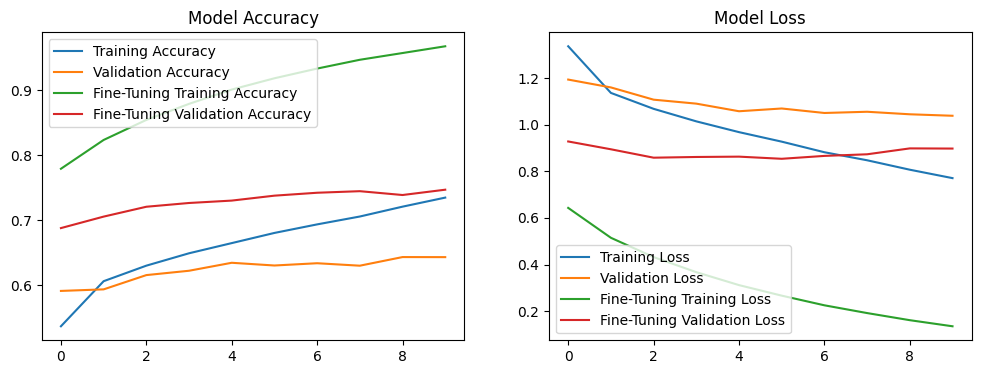

In [10]:
# Plotting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-Tuning Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuning Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Fine-Tuning Training Loss')
plt.plot(history_fine.history['val_loss'], label='Fine-Tuning Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

This simple lab demonstrates the power and ease of using transfer learning with pre-trained models like VGG16 in TensorFlow and Keras. By leveraging the learned features from a large dataset, we can achieve respectable performance on a new task with significantly less data and computation compared to training a model from scratch.

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://github.com/NikitaSingh24/Breast-Cancer-Deep-learning">https://github.com/NikitaSingh24/Breast-Cancer-Deep-learning</a></li>
  </ol>
</div>